In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# 1. Выбор набора данных

### 1.1. Дерматология (35)

In [2]:
def get_dermatology_data():
    data = pd.read_csv('dermatology.data')
    #Выделяем признак, по которому будем классифицировать объекты
    target_feature='spongiosis'
    target = data[target_feature]
    data = data.drop([target_feature], axis=1)
    X = data.iloc[:,:].values
    return data, X, target_feature, target

### 1.2. Вино (13)

In [3]:
def get_wine_data():
    data = pd.read_csv('wine-clustering.csv')
    X = data.iloc[:,:].values
    return data, X

### 1.3. Шахматы (16)

In [25]:
def get_chess_data(n_count=5000):
    data = pd.read_csv('games.csv')
    data = data.iloc[:n_count,:]
    
    #Выделяем признак, по которому будем классифицировать объекты
    target_feature='winner'
    #И признаки, которые не будем учитывать
    columns_to_drop=[target_feature,'id','moves','opening_name']
    
    category_data_columns = ["victory_status", "winner", "increment_code", "white_id", "black_id","opening_eco"]

    category_data = data[category_data_columns]

    # Кодирование категориальных признаков
    enc = preprocessing.OrdinalEncoder()
    enc.fit(category_data)

    category_data = pd.DataFrame(list(enc.transform(category_data)), columns=category_data_columns)
    
    for column in category_data_columns:
        data[column] = category_data[column]
    
    target = data[target_feature]
    data = data.drop(columns_to_drop, axis=1)
    
    scaler = MinMaxScaler()

    scaler.fit(data)
    data = pd.DataFrame(scaler.transform(data),columns=data.columns)
    X = data.iloc[:,:].values
    return data, X, target_feature, target

### 1.4. Валюта (2)

In [5]:
def get_currency_data():
    data = pd.read_csv('currency.csv')
    def processDate(x):
        temp_date = x.split('/')
        if len(temp_date) < 3:
            return x
        return str(int(temp_date[0]) * 31 + ((int(temp_date[2])) - 17) * 365 + int(temp_date[1]))

    data['Time'] = data['Time'].apply(processDate)
    
    scaler = MinMaxScaler()

    scaler.fit(data[['Time']])
    data['Time'] = scaler.transform(data[['Time']])

    scaler.fit(data[['Gems']])
    data['Gems'] = scaler.transform(data[['Gems']])
    X = data.iloc[:,:].values
    return data, X

### 1.5. Случайные смерти (2)

In [6]:
def get_accidents_data():
    data = pd.read_csv('accidental-deaths-in-usa-monthly.csv')
    def processDate(x):
        temp_date = x.split('-')
        if len(temp_date) < 2:
            return x
        return str((int(temp_date[0]) - 1973) * 12 + int(temp_date[1]))

    data['Month'] = data['Month'].apply(processDate)
    
    scaler = MinMaxScaler()

    scaler.fit(data[['Month']])
    data['Month'] = scaler.transform(data[['Month']])

    scaler.fit(data[['Deaths']])
    data['Deaths'] = scaler.transform(data[['Deaths']])
    
    X = data.iloc[:,:].values
    return data, X

# 2. Определение переменных и функций

In [7]:
cluster_number = 2

In [8]:
def buildSilhouetteCurve(silhouette_scores, n_clusters_min, n_clusters_max):
    rcParams['figure.figsize'] = 16, 5
    plt.plot(range(n_clusters_min, n_clusters_max + 1), silhouette_scores, "bo-", color='blue',
            linewidth=3, markersize=6, label='Кривая индекса')
    plt.xlabel("$k$", fontsize=14, family='Arial')
    plt.ylabel('Значение индекса', fontsize=14, family='Arial')
    plt.grid(which='major', color='#cccccc', linestyle="--")
    plt.title('Кривая индекса кластерного силуэта', family='Arial', fontsize=14)

    #Вычисляем оптимальное значение кластеров
    k = np.argmax(silhouette_scores) + 2

    #Рисуем вертикальную линию

    plt.axvline(x=k, linestyle='--', c='green', linewidth=3,
                label='Оптимальное количество кластеров ({})'.format(k))

    plt.scatter(k, silhouette_scores[k-2], c='red', s=400)

    plt.legend(shadow=True)

    plt.show()

In [9]:
def buildClusterScatter(labels, centroids, silhouette_score, data, ax):
    
    u_labels = np.unique(labels)
    
    for j in u_labels:
        temp_data = data.values
        ax.scatter(temp_data[labels == j,0], temp_data[labels == j,1], label = j)

    ax.legend()
    if centroids is not None:
        ax.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    ax.set_title('Индекс кластерного силуэта:' + str(round(silhouette_score,5)))

# 3. k-means

In [10]:
data, X = get_wine_data()
kmeans = KMeans(n_clusters=cluster_number, random_state=0)

In [11]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2,11)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

C:\Users\75BD~1\AppData\Local\Temp/ipykernel_32348/1067797533.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(n_clusters_min, n_clusters_max + 1), silhouette_scores, "bo-", color='blue',


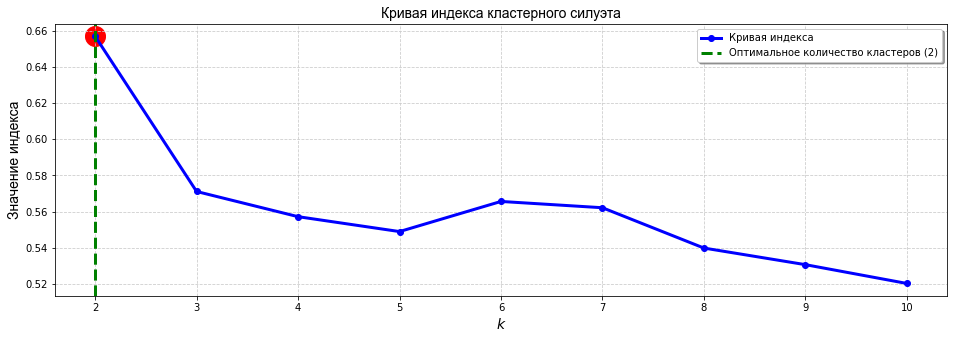

In [12]:
buildSilhouetteCurve(silhouette_scores, 2, 10)

In [15]:
import umap
from sklearn.manifold import TSNE

reducer = umap.UMAP()
tsne = TSNE(n_components=2, random_state=0)

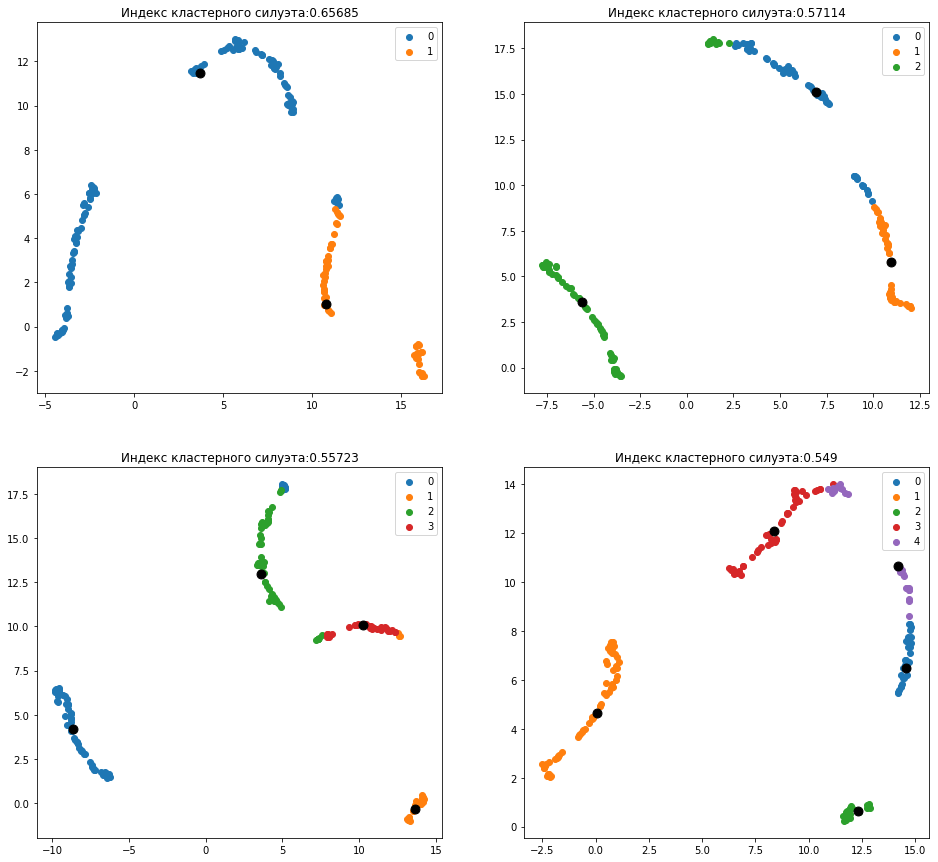

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(16,15))
ax = np.ravel(ax)

# 1 - UMAP
# 2 - TSNE
reducing_method = 1

cluster_number = 2
for i in range(4):
    km = KMeans(n_clusters=cluster_number, random_state=0)   
    labels = km.fit_predict(data)
    centroids = km.cluster_centers_
    
    data_2d = data
    if data_2d.shape[1] > 2:
        if reducing_method == 1:
            data_2d = reducer.fit_transform(np.concatenate((centroids, data)))
            centroids = data_2d[:cluster_number]
            data_2d = pd.DataFrame(data_2d[cluster_number:])
        elif reducing_method == 2:
            data_2d = tsne.fit_transform(np.concatenate((centroids, data)))
            centroids = data_2d[:cluster_number]
            data_2d = pd.DataFrame(data_2d[cluster_number:])
    buildClusterScatter(labels, centroids, silhouette_scores[i], data_2d, ax[i])
    cluster_number += 1
plt.show()

In [23]:
data, X, target_feature, target = get_chess_data(2500)
# 1 - UMAP
# 2 - TSNE
reducing_method = 1
cluster_number = len(np.unique(target))

km = KMeans(n_clusters=cluster_number, random_state=0)   
labels = km.fit_predict(data)
centroids = km.cluster_centers_
    
data_2d = data
if reducing_method == 1:
    data_2d = reducer.fit_transform(np.concatenate((centroids, data)))
    centroids = data_2d[:cluster_number]
    data_2d = pd.DataFrame(data_2d[cluster_number:])
elif reducing_method == 2:
    data_2d = tsne.fit_transform(np.concatenate((centroids, data)))
    centroids = data_2d[:cluster_number]
    data_2d = pd.DataFrame(data_2d[cluster_number:])

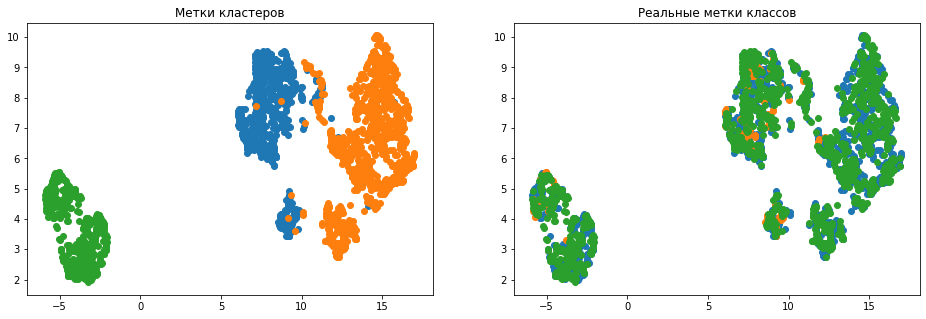

In [24]:
_, ax = plt.subplots(1,2,figsize=(16,5))

target_values = [labels,target]

titles = ["Метки кластеров", "Реальные метки классов"]
colors = ['blue','green','red','orange','yellow','cyan']
for ax_num in range(2):
    data_2d['Cluster'] = target_values[ax_num]
    for i in range(len(np.unique(data_2d['Cluster']))):
    
        temp_df = data_2d[data_2d.Cluster==i]

        ax[ax_num].scatter(temp_df[0],temp_df[1],label=i)
        ax[ax_num].set_title(titles[ax_num])
        
plt.show()

# 4. FCM

In [28]:
from fcmeans import FCM

In [29]:
data, X = get_accidents_data()
silhouette_scores = []
for k in range(2,11):
    fcm = FCM(n_clusters=k)
    fcm.fit(X)
    silhouette_scores.append(silhouette_score(X, fcm.predict(X)))

C:\Users\75BD~1\AppData\Local\Temp/ipykernel_32348/1067797533.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(n_clusters_min, n_clusters_max + 1), silhouette_scores, "bo-", color='blue',


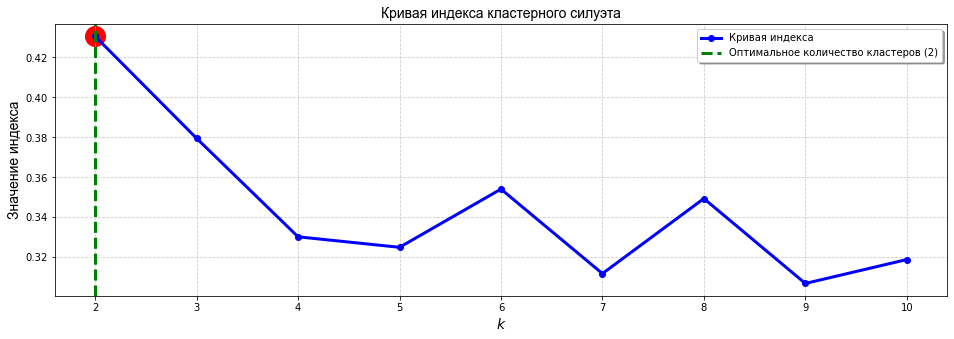

In [30]:
buildSilhouetteCurve(silhouette_scores, 2, 10)

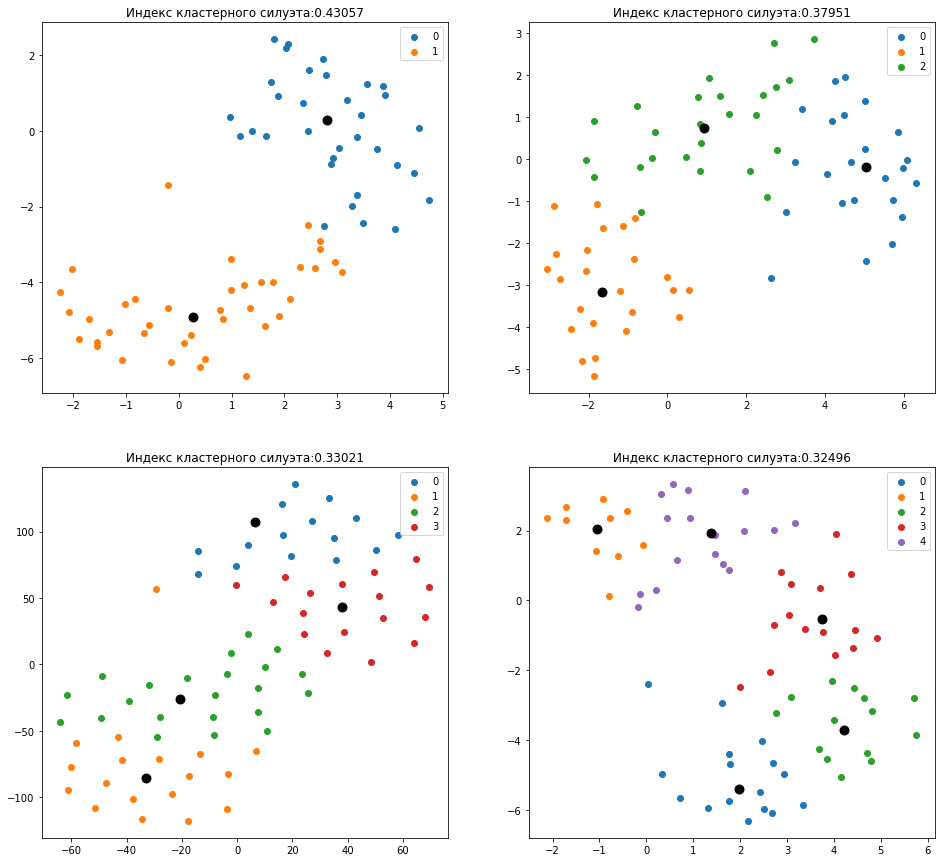

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(16,15))
ax = np.ravel(ax)

# 1 - UMAP
# 2 - TSNE
reducing_method = 2

cluster_number = 2
for i in range(4):
    fcm = FCM(n_clusters=cluster_number)
    fcm.fit(data.values)
    labels = fcm.predict(data.values)
    centroids = fcm.centers
    
    data_2d = data
    if reducing_method == 1:
        data_2d = reducer.fit_transform(np.concatenate((centroids, data)))
        centroids = data_2d[:cluster_number]
        data_2d = pd.DataFrame(data_2d[cluster_number:])
    elif reducing_method == 2:
        data_2d = tsne.fit_transform(np.concatenate((centroids, data)))
        centroids = data_2d[:cluster_number]
        data_2d = pd.DataFrame(data_2d[cluster_number:])
    buildClusterScatter(labels, centroids, silhouette_scores[i], data_2d, ax[i])
    cluster_number += 1
plt.show()

# 5. DBSCAN

In [230]:
from sklearn.cluster import DBSCAN

Количество кластеров: 4


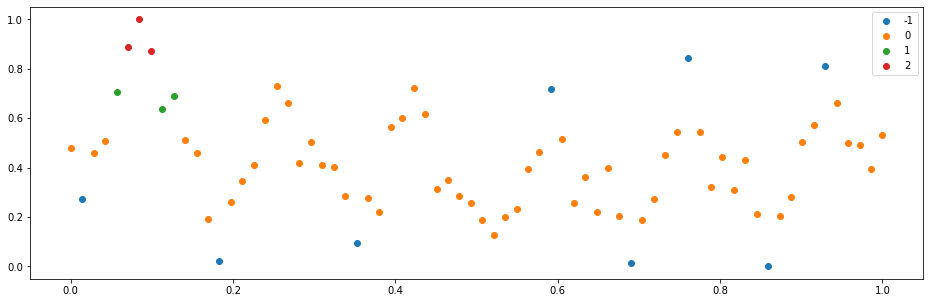

In [39]:
data, X = get_accidents_data()

dbscan = DBSCAN(eps=10, min_samples=15)
labels = dbscan.fit_predict(data)
#labels = dbscan.labels_

# 1 - UMAP
# 2 - TSNE
reducing_method = 1

dbscan = DBSCAN(eps=0.12, min_samples=3)
dbscan.fit(data.values)
labels = dbscan.labels_

print('Количество кластеров:', len(np.unique(labels)))

data_2d = data
if reducing_method == 1:
    data_2d = reducer.fit_transform(data)
    data_2d = pd.DataFrame(data_2d)
elif reducing_method == 2:
    data_2d = tsne.fit_transform(data)
    data_2d = pd.DataFrame(data_2d)

u_labels = np.unique(labels)
    
for j in u_labels:
    temp_data = data.values
    plt.scatter(temp_data[labels == j,0], temp_data[labels == j,1], label = j)

plt.legend()
    
cluster_number += 1
plt.show()